In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
# M: Số time slot, số lượng này phải lớn hơn hoặc bằng số lượng người dùng
M = np.arange(100, 125, 5)
# N: Số người dùng truy cập time slot
N = np.arange(100, 125, 5)
# M = (1+epsilon)N
epsilon = []
for i in range(len(M)):
    ls = []
    for j in range(len(N)):
        tmp = (M[i] / N[j]) - 1
        ls.append(tmp)
    epsilon.append(ls)

Gm = []
for i in range(len(N)):
    tmp = np.random.rand(N[i])
    Gm.append(tmp)
print(f"Gm: {len(Gm)} hàng, và số cột là số N[i]")
print(f"Epsilon: {len(epsilon)} hàng, {len(epsilon[0])} cột")
print(epsilon)

Gm: 5 hàng, và số cột là số N[i]
Epsilon: 5 hàng, 5 cột
[[0.0, -0.04761904761904767, -0.09090909090909094, -0.13043478260869568, -0.16666666666666663], [0.050000000000000044, 0.0, -0.045454545454545414, -0.08695652173913049, -0.125], [0.10000000000000009, 0.04761904761904767, 0.0, -0.04347826086956519, -0.08333333333333337], [0.1499999999999999, 0.09523809523809534, 0.045454545454545414, 0.0, -0.04166666666666663], [0.19999999999999996, 0.1428571428571428, 0.09090909090909083, 0.04347826086956519, 0.0]]


In [213]:
"""
    Xác suất truy cập slot sm là pm
    Bậc của sm tuân theo phân bố nhị thức, có thể tính bằng phân phối Poisson
    Gm: Kỳ vọng bậc của slot m ~ Số user truy cập tới slot m
"""
# Psi_m: Xác suất 1 node ngẫu nhiên có bậc là x
def Psi_mX(Gm, x, i):
    tmp = -Gm[i] * (1 - x)
    return np.exp(tmp)

# Psi_X: Trung bình phân phối bậc
def Psi_X(Gm, x, M):
    tmp = 0
    for i in range(M):
        tmp += Psi_mX(Gm, x)
    return tmp / M

In [214]:
G = []
for i in range(len(Gm)):
    tmp = np.sum(Gm[i])
    ls = []
    for j in range(len(M)):
        tmp = tmp / M[j]
        ls.append(tmp)
    G.append(ls)
print(G)

[[0.49074522716653235, 0.004673764068252689, 4.248876425684262e-05, 3.694675152768924e-07, 3.07889596064077e-09], [0.556017432370537, 0.005295404117814638, 4.814003743467853e-05, 4.1860902117111766e-07, 3.4884085097593137e-09], [0.5460668560583541, 0.005200636724365278, 4.7278515676047975e-05, 4.111175276178085e-07, 3.425979396815071e-09], [0.6022457445980879, 0.0057356737580770275, 5.214248870979116e-05, 4.534129453025318e-07, 3.778441210854432e-09], [0.6213165884910967, 0.00591730084277235, 5.379364402520318e-05, 4.6777081761046243e-07, 3.898090146753854e-09]]


In [215]:
"""
    qi(ri): xác suất trung bình mà một cạnh thuộc đồ thị liên quan đến slot tồn tại trong vòng lặp thứ i
    ri: xác suất một slot trên đường truyền vẫn tồn tại qua vòng lặp thứ i
"""
def Pr_max(G, epsilon):
    return 1 - np.exp(-1 * (1 + epsilon)*G)

Pr = []
for i in range(len(M)):
    ls = []
    for j in range(len(N)):
        tmp = Pr_max(G[i][j], epsilon[i][j])
        ls.append(tmp)
    Pr.append(ls)
print(Pr)

[[0.38782998157453685, 0.004441311948995108, 3.8625403344316744e-05, 3.2127604865372916e-07, 2.565746615168507e-09], [0.44223541928715815, 0.005281408181040836, 4.595079814462277e-05, 3.8220816367395827e-07, 3.0523574778840157e-09], [0.4515578869501221, 0.005433471099172471, 4.7277398064649034e-05, 3.932427752317835e-07, 3.14048109739673e-09], [0.4997176331629023, 0.006262238341572246, 5.4511116048039376e-05, 4.5341284249378333e-07, 3.6210061615804534e-09], [0.5255409216098503, 0.0067398144145246475, 5.868225342942068e-05, 4.881085601260438e-07, 3.898090183973579e-09]]


Mean Pr when N = 100 is 0.07846204855373431
Mean Pr when N = 105 is 0.08951263270537295
Mean Pr when N = 110 is 0.09140780636612311
Mean Pr when N = 115 is 0.10120696793087425
Mean Pr when N = 120 is 0.10646798205689094


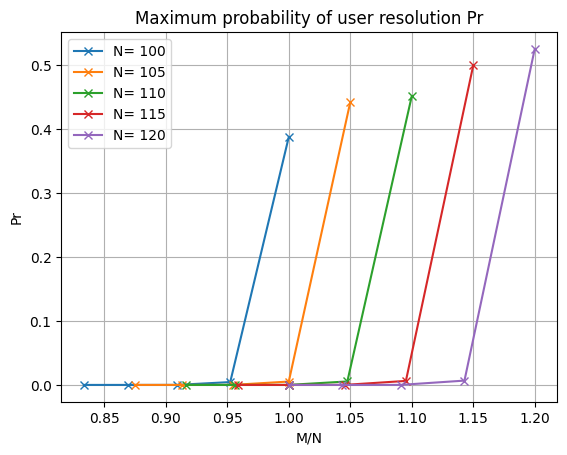

In [216]:
M_over_N = []
for i in range(len(M)):
    ls = []
    for j in range(len(N)):
        tmp = M[i]/N[j]
        ls.append(tmp)
    M_over_N.append(ls)
for i in range(len(M)):
    plt.plot(M_over_N[i], Pr[i], marker = 'x', label = f"N= {N[i]}")
    mean = sum(Pr[i]) / len(Pr[i])
    print(f"Mean Pr when N = {N[i]} is {mean}")
plt.legend()
plt.xlabel("M/N")
plt.ylabel("Pr")
plt.title("Maximum probability of user resolution Pr")
plt.grid(True)
plt.show()



Mean throughput T* when N = 100 is 0.07850724392220246
Mean throughput T* when N = 105 is 0.08530131180141473
Mean throughput T* when N = 110 is 0.08314827140725328
Mean throughput T* when N = 115 is 0.08806147329029258
Mean throughput T* when N = 120 is 0.08878047387107099


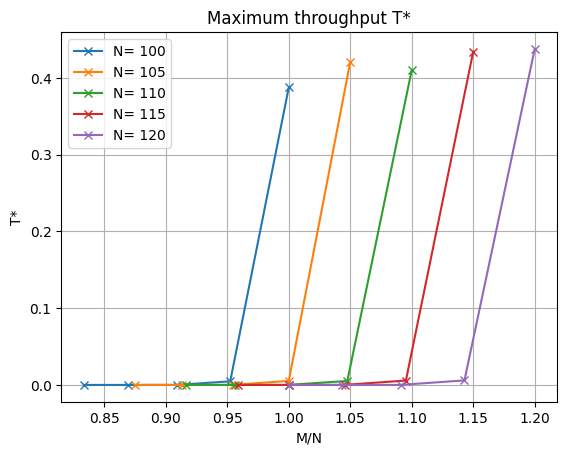

In [217]:
T = []
for i in range(len(G)):
    ls = []
    for j in range(len(epsilon)):
        tmp = Pr[i][j] / (1 + epsilon[i][j])
        ls.append(tmp)
    T.append(ls)
for i in range(len(M)):
    plt.plot(M_over_N[i], T[i], marker = 'x', label = f"N= {N[i]}")
    mean = sum(T[i]) / len(Pr[i])
    print(f"Mean throughput T* when N = {N[i]} is {mean}")
plt.legend()
plt.xlabel("M/N")
plt.ylabel("T*")
plt.title("Maximum throughput T*")
plt.grid(True)
plt.show()

In [218]:
print(T)
print(Pr)

[[0.38782998157453685, 0.004663377546444864, 4.248794367874842e-05, 3.6946745595178855e-07, 3.0788959382022084e-09], [0.42117658979729344, 0.005281408181040836, 4.813893138960481e-05, 4.1860894116671624e-07, 3.488408546153161e-09], [0.4105071699546564, 0.005186495140119177, 4.7277398064649034e-05, 4.111174468332282e-07, 3.425979378978251e-09], [0.43453707231556726, 0.005717695877087702, 5.214106752421158e-05, 4.5341284249378333e-07, 3.7784412120839515e-09], [0.43795076800820865, 0.0058973376127090665, 5.379206564363563e-05, 4.677707034541253e-07, 3.898090183973579e-09]]
[[0.38782998157453685, 0.004441311948995108, 3.8625403344316744e-05, 3.2127604865372916e-07, 2.565746615168507e-09], [0.44223541928715815, 0.005281408181040836, 4.595079814462277e-05, 3.8220816367395827e-07, 3.0523574778840157e-09], [0.4515578869501221, 0.005433471099172471, 4.7277398064649034e-05, 3.932427752317835e-07, 3.14048109739673e-09], [0.4997176331629023, 0.006262238341572246, 5.4511116048039376e-05, 4.53412842